# Recap: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by **`square feet`**, but a lot of other variables play a vital role: **`bedrooms`**, **`bathrooms`**, **`location`**, **`appliances`**, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called *multicollinearity*.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics



import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm


bike_data = pd.read_csv('https://github.com/ga-students/DAT-NYC-37/raw/master/lessons/lesson-07/assets/dataset/bikeshare.csv')
bike_data.head()

%matplotlib inline

## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

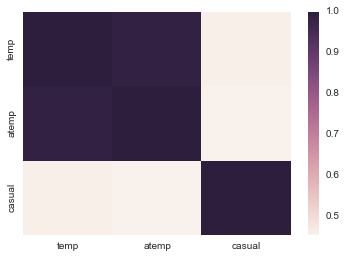

In [2]:
# Your answer

sns.heatmap(bike_data[['temp', 'atemp', 'casual']].corr())


#### Question: What did we find? 

In [78]:
# Your answer

## Intro to scikit learn

*Review the following code:*

In [24]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y):
    # Step 1:
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model

    # Step 2:
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # Step 3:
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In your own words, explain what the following steps are doing in the above code:

In [80]:
# Step 1:
# Your answer here
    
# Step 2:
# Your answer here
    
# Step 3:
# Your answer here

In [23]:
# Target variable (outcome)
y = bike_data['casual']

# Possible features
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

# TODO: Compute the following for 'temp', 'atemp', and both 'temp' and 'atemp'

get_linear_model_metrics(bike_data[['atemp']], y)
get_linear_model_metrics(bike_data[['temp']], y)
get_linear_model_metrics(bike_data[['temp', 'atemp']], y)
get_linear_model_metrics(bike_data[['hum', 'atemp']], y)



# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733

P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163

P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661

P Values: [ 0.  0.]
Coefficients: [ -82.88494001  125.44771399]
y-intercept: 27.9791442151
R-Squared: 0.311093509696



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

-0.00602088334827
-0.94184420407


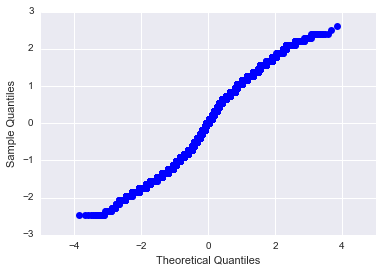

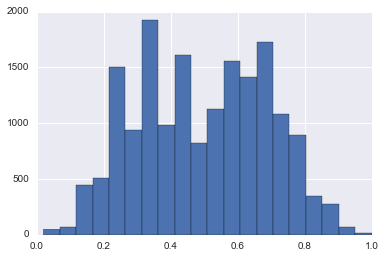

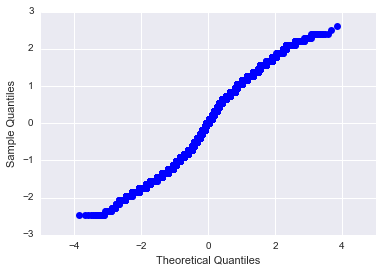

In [82]:
print bike_data['temp'].skew()
print bike_data['temp'].kurt()

bike_data['temp'].hist(bins=20)
sm.qqplot(bike_data['temp'], fit=True)

### Question: Has our model improved when using both temp, atemp?

In [43]:
# Your answer here

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



In [ ]:
# Plot the corr matrix

In [ ]:
# Compute the following:

# P Values: ?
# Coefficients: ?
# y-intercept: ?
# R-Squared: ?

## Guided Practice: Multicollinearity with dummy variables

There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [12]:
lm = linear_model.LinearRegression()
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
bike_data.weathersit.value_counts()

weather = pd.get_dummies(bike_data.weathersit)
weather

,1,2,3,4
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [20]:
all_weather_outcomes = get_linear_model_metrics(weather[[1,2,3,4]],y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913



In [19]:
get_linear_model_metrics(weather[[1,2,3]],y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913

P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Similar in Statsmodels

In [21]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           1.13e-87
Time:                        20:05:58   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.319e+12   5.17e+13     -0.064      0.949     -1.05e+14  9.79e+13
weather[[1, 2, 3, 4]][0]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][1]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][2]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][3]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
==============================================================================
Omnibus:                     8995.399   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58868.810
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     3.88e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Students: Now drop one

In [22]:
# dropping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 22 Jun 2016   Prob (F-statistic):           8.08e-89
Time:                        20:06:18   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [ ]:
bike_data.dtypes

In [ ]:
bike_data.describe()